<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/Mapping_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install geopandas

!pip install pysal 

  Using cached https://files.pythonhosted.org/packages/ae/81/15c6ee658197330923cbd892b82323c4b8ac276503f9d38620343acb3822/pysal-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/98/b8/90e8d8a1cf8e5d38c89debf40d5bc89496395b5e2014a1de22228ead4b55/libpysal-4.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/b3/5d/7331b59591001d8a290d8a46a401f1192f7dda5a3ee074bf71ab4869b94a/access-1.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/ee/80d6c041e4b5b81a41058efcb4b92b03bc13d6005dd5263f8a7896ee8804/esda-2.3.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/5c/71/f7fc2b41e36b2a06bac30937435d2dedd125f74f3157213ec121ff52d961/giddy-2.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/0f/9ed2d097f29160d0c873f33ffc0b9806c1083e3611acb2143eb66adcf580/inequality-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/5f/2b/a3e99c42b37c3e848eb8e55f2ee2b2d281ae0d49df261f13eaaeba7171a5/poin

In [7]:
!pip install descartes

In [8]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

In [9]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [10]:
us_states = gp.read_file('/content/data/tl_2019_us_state.shp')

us_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [11]:
us_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [12]:
us_states['geometry'].head()

0    POLYGON ((-81.74725 39.09538, -81.74635 39.096...
1    MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...
2    POLYGON ((-91.18529 40.63780, -91.17510 40.643...
3    POLYGON ((-96.78438 46.63050, -96.78434 46.630...
4    POLYGON ((-77.45881 39.22027, -77.45866 39.220...
Name: geometry, dtype: geometry

. original_crs is the latlon co-ordinates; target_crs is a mercator ('merc') projection; and the third line, to_crs projects the geometry so we can plot it

In [13]:
us_states.crs = {'init':'EPSG:4269'}
target_crs = {'datum':'NAD83', 'no_defs':True, 'proj':'merc'}


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


projected_londonWards = londonWards.to_crs(crs=target_crs) --> does not work

In [14]:
projected_us_states = us_states.to_crs(crs=target_crs)

In [15]:
us_states['NAME'].unique()

array(['West Virginia', 'Florida', 'Illinois', 'Minnesota', 'Maryland',
       'Rhode Island', 'Idaho', 'New Hampshire', 'North Carolina',
       'Vermont', 'Connecticut', 'Delaware', 'New Mexico', 'California',
       'New Jersey', 'Wisconsin', 'Oregon', 'Nebraska', 'Pennsylvania',
       'Washington', 'Louisiana', 'Georgia', 'Alabama', 'Utah', 'Ohio',
       'Texas', 'Colorado', 'South Carolina', 'Oklahoma', 'Tennessee',
       'Wyoming', 'Hawaii', 'North Dakota', 'Kentucky',
       'United States Virgin Islands',
       'Commonwealth of the Northern Mariana Islands', 'Guam', 'Maine',
       'New York', 'Nevada', 'Alaska', 'American Samoa', 'Michigan',
       'Arkansas', 'Mississippi', 'Missouri', 'Montana', 'Kansas',
       'Indiana', 'Puerto Rico', 'South Dakota', 'Massachusetts',
       'Virginia', 'District of Columbia', 'Iowa', 'Arizona'],
      dtype=object)

In [25]:
us_states1= us_states[(us_states['NAME']!='Hawaii')&(us_states['NAME']!='Alaska')&(us_states['NAME']!='Commonwealth of the Northern Mariana Islands')&(us_states['NAME']!='United States Virgin Islands')&(us_states['NAME']!='Guam')&(us_states['NAME']!='American Samoa')&(us_states['NAME']!='Puerto Rico')]

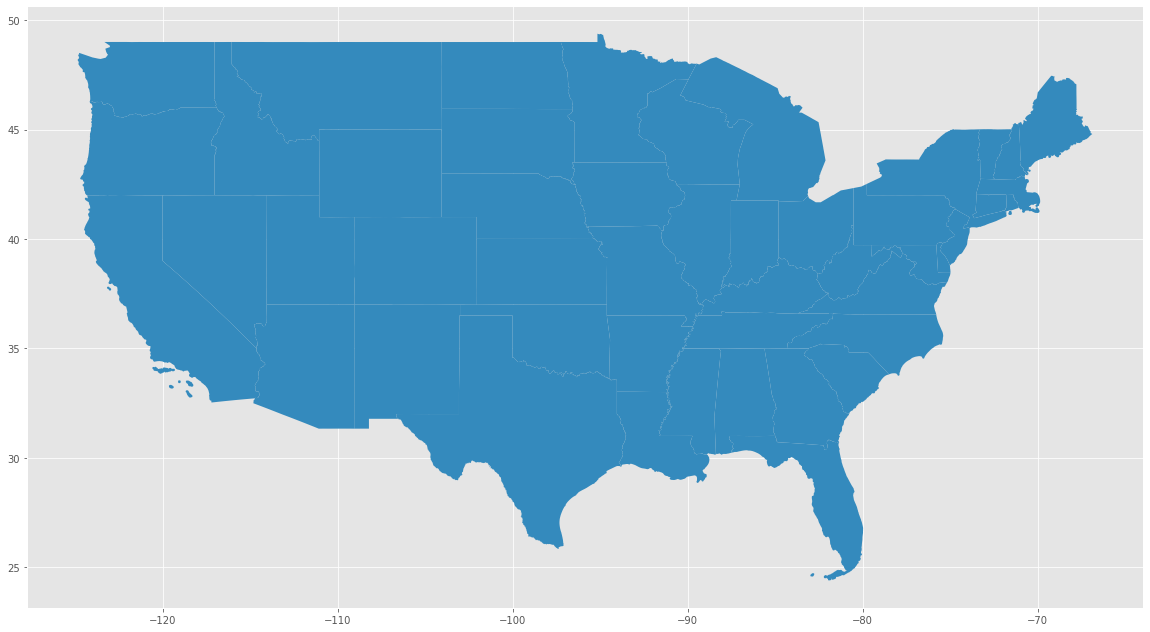

In [26]:
us_states1.plot()